Make sure to set the runtime to GPU: Runtime -> Change runtime type -> T4 GPU

You can upload your own images, then change the relevant code cells to load it and send it through the model.

In [1]:
# # install the intrinsic decomposition repo from github
# !pip install https://github.com/compphoto/Intrinsic/archive/main.zip

In [2]:
import numpy as np
import torch

# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, uninvert, view_scale
from chrislib.data_util import load_image

# import model loading and running the pipeline
from intrinsic.pipeline import run_pipeline
from intrinsic.model_util import load_models

In [ ]:
# download the pretrained weights and return the model (may take a bit to download weights)
intrinsic_model = load_models('paper_weights')

In [4]:
# # load an example image from the github repo
# torch.hub.download_url_to_file('https://raw.githubusercontent.com/compphoto/Intrinsic/main/figures/avocado.png', 'avo.png')

In [ ]:
import importlib
from utils.imagefolder_dataset import ImageFolderLoader
from utils import image_util
importlib.reload(image_util)

In [6]:
data_dir_paths = [
    "data/IIW",
    "data/Unsplash",
    "data/AdobeStock",
    "data/BigTime_v1/0030",
    "data/BigTime_v1/0306",
]
loading_data_modes = [
    None,
    None,
    None,
    "with_mask",
    "with_mask"    
]
folder_dataset = ImageFolderLoader(
    data_dir=data_dir_paths[0],
    mode=loading_data_modes[0]
)
print(f"Number of images: {len(folder_dataset)}")

Dataloader: data/IIW folder, None mode.
Number of images: 9


In [7]:
import os
output_dir = "out"
os.makedirs(output_dir, exist_ok=True)

In [13]:
for i in range(len(data_dir_paths)):
    data_dir_path = data_dir_paths[i]
    loading_data_mode = loading_data_modes[i]
    folder_dataset = ImageFolderLoader(
        data_dir=data_dir_path,
        mode=loading_data_mode
    )
    print(f"{len(folder_dataset)} images in path: {data_dir_path} ")
    for k in range(len(folder_dataset)):
        data = folder_dataset[k]
        img_path = data["img_path"]
        img_dir = os.path.dirname(img_path)
        img_name = data["img_name"]
        srgb_img = data["srgb_img"]
        srgb_img_np = srgb_img.cpu().permute(1, 2, 0).numpy()
        # run the image through the pipeline (use R0 resizing dicussed in the paper)
        result = run_pipeline(
            intrinsic_model,
            srgb_img_np,
            resize_conf=0.0,
            maintain_size=True,
            linear=False,
            device='cuda'
        )
        # convert the inverse shading to regular shading for visualization
        shd = uninvert(result['inv_shading'])
        alb = result['albedo']
        vis_shd = view(shd, p=99.5)
        vis_alb = view(alb, p=99.5)
        # show([srgb_img_np, vis_shd, vis_alb], size=(20, 7))
        out_path = os.path.join(output_dir, img_dir)
        file_shd = f"{img_name}_s.png"
        file_alb = f"{img_name}_a.png"
        image_util.save_srgb_image(vis_shd, out_path, file_shd)
        image_util.save_srgb_image(vis_alb, out_path, file_alb)
        print(f"Saving shading to {out_path}/{file_shd}")
        print(f"Saving albedo to {out_path}/{file_alb}")        

Dataloader: data/IIW folder, None mode.
9 images in path: data/IIW 


libpng warning: iCCP: known incorrect sRGB profile


Saving shading to out/data/IIW/59157_s.png
Saving albedo to out/data/IIW/59157_a.png
Saving shading to out/data/IIW/26616_s.png
Saving albedo to out/data/IIW/26616_a.png
Saving shading to out/data/IIW/78729_s.png
Saving albedo to out/data/IIW/78729_a.png
Saving shading to out/data/IIW/63508_s.png
Saving albedo to out/data/IIW/63508_a.png
Saving shading to out/data/IIW/4136_s.png
Saving albedo to out/data/IIW/4136_a.png


libpng warning: iCCP: known incorrect sRGB profile


Saving shading to out/data/IIW/101439_s.png
Saving albedo to out/data/IIW/101439_a.png
Saving shading to out/data/IIW/109871_s.png
Saving albedo to out/data/IIW/109871_a.png
Saving shading to out/data/IIW/102613_s.png
Saving albedo to out/data/IIW/102613_a.png


libpng warning: iCCP: known incorrect sRGB profile


Saving shading to out/data/IIW/8171_s.png
Saving albedo to out/data/IIW/8171_a.png
Dataloader: data/Unsplash folder, None mode.
6 images in path: data/Unsplash 
Saving shading to out/data/Unsplash/avocado_Debby Hudson_s.png
Saving albedo to out/data/Unsplash/avocado_Debby Hudson_a.png
Saving shading to out/data/Unsplash/outdoor_arch_Miguel Ibáñez_s.png
Saving albedo to out/data/Unsplash/outdoor_arch_Miguel Ibáñez_a.png
Saving shading to out/data/Unsplash/tea_Avi Waxman_s.png
Saving albedo to out/data/Unsplash/tea_Avi Waxman_a.png
Saving shading to out/data/Unsplash/table_Kevin Kristhian_s.png
Saving albedo to out/data/Unsplash/table_Kevin Kristhian_a.png
Saving shading to out/data/Unsplash/bar_Logan Stone_s.png
Saving albedo to out/data/Unsplash/bar_Logan Stone_a.png
Saving shading to out/data/Unsplash/outdoor_arch_William Jones_s.png
Saving albedo to out/data/Unsplash/outdoor_arch_William Jones_a.png
Dataloader: data/AdobeStock folder, None mode.
1 images in path: data/AdobeStock 

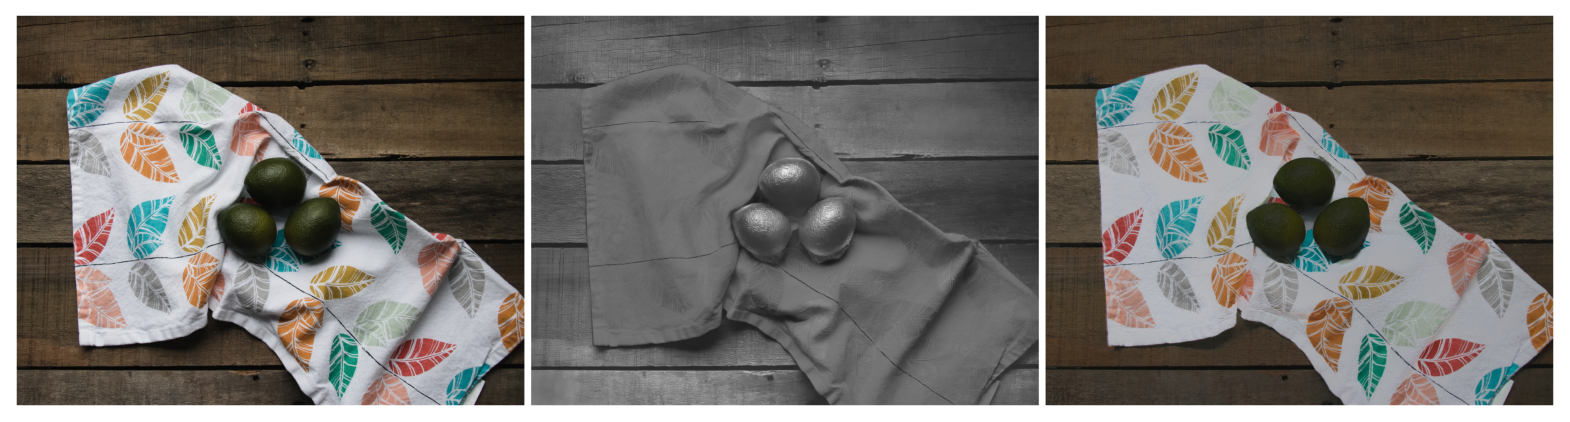

In [8]:
# show the result (gamma corrects the linear intrinsic components and scales to [0-1])
show([img, view(shd), view(alb)], size=(20, 7))